In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)


In [3]:
# Extract the 'Close' prices
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [4]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [5]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    return model


In [6]:
# Reshape the training data
train_x = np.reshape(train_data, (train_data.shape[0], 1, train_data.shape[1]))

# Create the LSTM model
model = create_lstm_model()

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_data, epochs=10, batch_size=1)


Epoch 1/10
1628/1628 [==============================] - 11s 3ms/step - loss: 0.0048
Epoch 2/10
1628/1628 [==============================] - 4s 3ms/step - loss: 6.7059e-05
Epoch 3/10
1628/1628 [==============================] - 5s 3ms/step - loss: 9.1952e-06
Epoch 4/10
1628/1628 [==============================] - 5s 3ms/step - loss: 1.1835e-05
Epoch 5/10
1628/1628 [==============================] - 4s 3ms/step - loss: 4.7095e-05
Epoch 6/10
1628/1628 [==============================] - 6s 4ms/step - loss: 2.0041e-05
Epoch 7/10
1628/1628 [==============================] - 5s 3ms/step - loss: 2.8357e-05
Epoch 8/10
1628/1628 [==============================] - 4s 3ms/step - loss: 2.2177e-05
Epoch 9/10
1628/1628 [==============================] - 6s 3ms/step - loss: 3.6389e-05
Epoch 10/10
1628/1628 [==============================] - 4s 3ms/step - loss: 1.9461e-05


In [7]:
# Reshape the test data
test_x = np.reshape(test_data, (test_data.shape[0], 1, test_data.shape[1]))

# Make predictions
predictions = model.predict(test_x)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)


13/13 [==============================] - 2s 2ms/step


<ipython-input-8-6ec95bcf6dea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


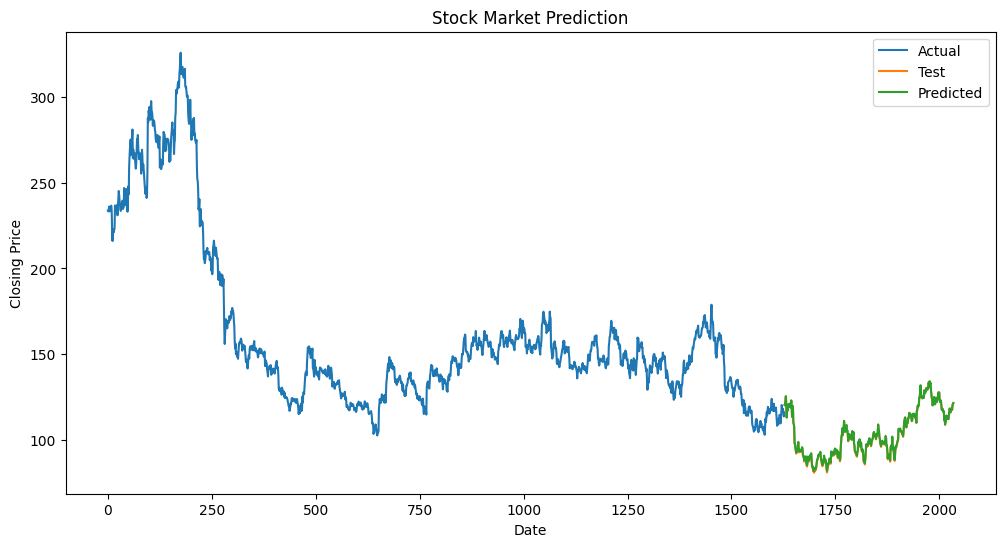

In [8]:
# Create plots for actual vs. predicted prices
train = data[:train_size]
test = data[train_size:]
test['Predictions'] = predictions

plt.figure(figsize=(12, 6))
plt.title('Stock Market Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train.index, train['Close'], label='Actual')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, test['Predictions'], label='Predicted')
plt.legend()
plt.show()
